In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense


In [3]:
df = pd.read_csv('../dataset/diabetes2.csv')

##### organize the data

In [4]:
df_positive = df[ df['Diabetes_binary'] == 1 ] 
df_negative = df[ df['Diabetes_binary'] == 0 ]
df_negative_cut = df_negative.sample(n = 40000)
dataset = pd.concat([df_positive, df_negative_cut])

##### drop data

In [9]:
X = dataset.drop(['Diabetes_binary','Education','NoDocbcCost','Income','Education','DiffWalk','AnyHealthcare'], axis=1)
y = dataset['Diabetes_binary']


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,Sex,Age
8,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,5.0,30.0,30.0,0.0,9.0
10,0.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0,13.0
13,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,11.0
17,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,7.0
23,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49461,1.0,0.0,1.0,43.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,5.0
214157,0.0,1.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,20.0,0.0,0.0,9.0
82212,0.0,0.0,1.0,30.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,6.0
149202,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,8.0


In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [8]:
model = Sequential()

model.add(Dense(19, input_shape=(16,), activation='relu'))
model.add(Dense(11, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-11-10 12:09:26.245921: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-10 12:09:26.246134: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
result = model.fit(X_train, y_train, epochs = 8, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/8


2022-11-08 15:36:42.957853: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-08 15:36:43.197253: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


6028/6028 [==============================] - ETA: 0s - loss: 0.5553 - accuracy: 0.7147

2022-11-08 15:37:21.903001: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


6028/6028 [==============================] - 43s 7ms/step - loss: 0.5553 - accuracy: 0.7147 - val_loss: 0.5304 - val_accuracy: 0.7309
Epoch 2/8
6028/6028 [==============================] - 38s 6ms/step - loss: 0.5271 - accuracy: 0.7346 - val_loss: 0.5455 - val_accuracy: 0.7220
Epoch 3/8
6028/6028 [==============================] - 40s 7ms/step - loss: 0.5208 - accuracy: 0.7397 - val_loss: 0.5174 - val_accuracy: 0.7403
Epoch 4/8
6028/6028 [==============================] - 40s 7ms/step - loss: 0.5184 - accuracy: 0.7404 - val_loss: 0.5262 - val_accuracy: 0.7324
Epoch 5/8
6028/6028 [==============================] - 42s 7ms/step - loss: 0.5152 - accuracy: 0.7431 - val_loss: 0.5156 - val_accuracy: 0.7411
Epoch 6/8
6028/6028 [==============================] - 38s 6ms/step - loss: 0.5134 - accuracy: 0.7451 - val_loss: 0.5159 - val_accuracy: 0.7417
Epoch 7/8
6028/6028 [==============================] - 38s 6ms/step - loss: 0.5123 - accuracy: 0.7447 - val_loss: 0.5133 - val_accuracy: 0.7429
Ep

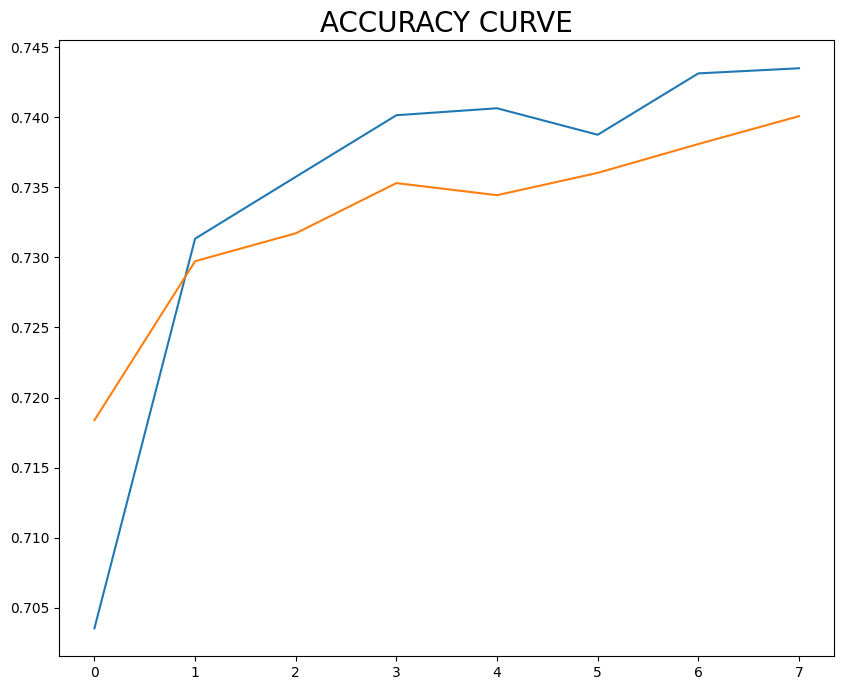

In [154]:
plt.figure(figsize=(10,8))
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('ACCURACY CURVE',fontdict={'size':20})
plt.show()

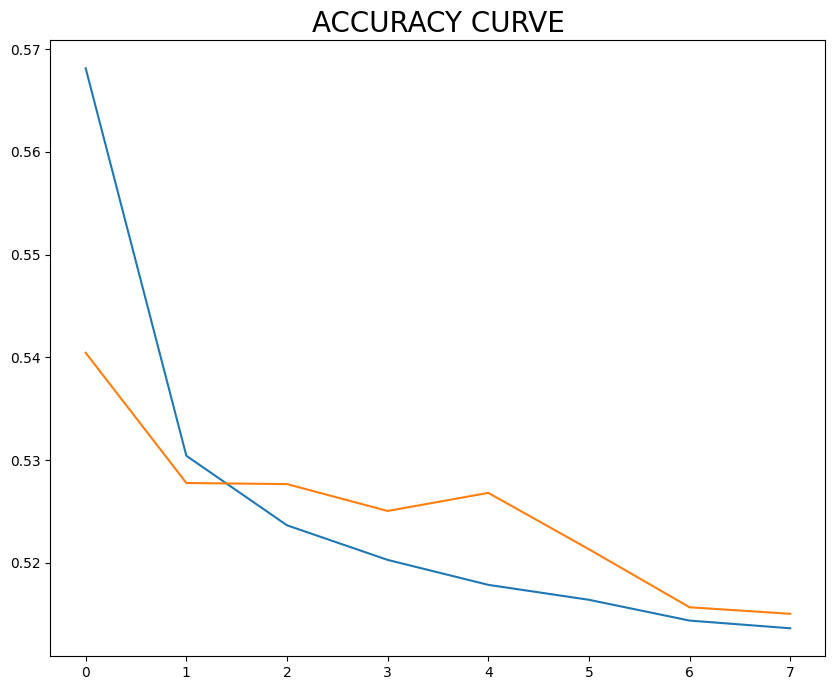

In [155]:
plt.figure(figsize=(10,8))
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('ACCURACY CURVE',fontdict={'size':20})
plt.show()

In [96]:
model.evaluate(X_test, y_test)

  1/471 [..............................] - ETA: 2:18 - loss: 0.3846 - accuracy: 0.8125

2022-11-08 09:11:27.017283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


471/471 [==============================] - 2s 4ms/step - loss: 0.5147 - accuracy: 0.7431


[0.5147007703781128, 0.7431320548057556]

model.save('./model',overwrite=True)

In [156]:
model.save('./model',overwrite=True)

INFO:tensorflow:Assets written to: ./model/assets


In [21]:
diabetes_model = tf.saved_model.load('./model')

content = [[0, 0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 23, 3]]
predict_dataset = tf.convert_to_tensor(content,dtype=tf.float32)
print(predict_dataset)
predictions = diabetes_model(predict_dataset, training=False)
print(predictions[0])


tf.Tensor([[ 0.  0.  0. 20.  0.  0.  0.  0.  0.  0.  0.  1.  2.  0. 23.  3.]], shape=(1, 16), dtype=float32)
tf.Tensor([0.00055741], shape=(1,), dtype=float32)


2022-11-08 16:33:51.393729: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
